# NGS - Quality control, Alignment, Visualisation
### SIB-SWISS
#### https://sib-swiss.github.io/NGS-introduction-training/2022.5/

-------------------------------------------------------------------------------------------------------------------------------

#### Target:
- Understand the basics of the different NGS technologies
- Perform quality control for better downstream analysis
- Align reads to a reference genome
- Visualize the output

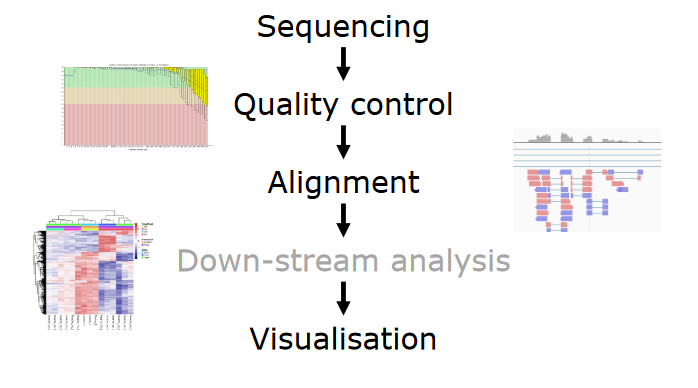

-------------------------------------------------------------------------------------------------------------------------------

## Different techniques:
- Transcriptome characterization RNA-seq
- Epigenome characterization ATAC-seq
- DNA-protein interactions ChIP-seq
- Whole genome (assembly)
- Variant detection
- Metagenome characterization

-------------------------------------------------------------------------------------------------------------------------------

## Illumina sequencing:

- Sequencing-by-synthesis: 2nd generation sequencing
- Massive throughput: up to 500 x 109 bases/run
- Most used platform today
- 50 – 300 bp
- Paired-end (or single-end)
- Multiplexing

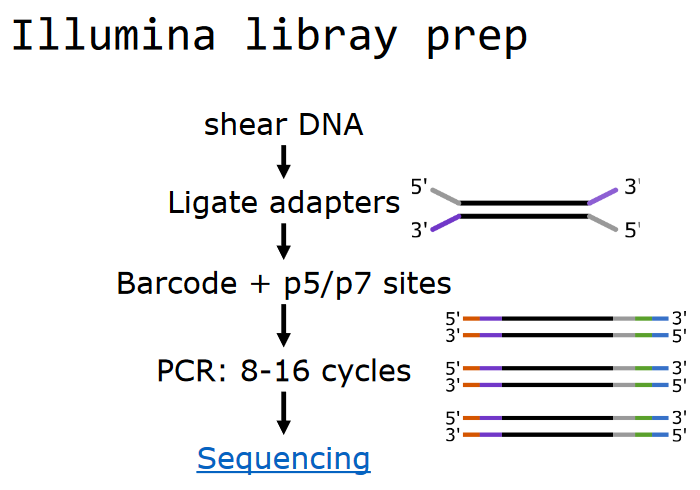


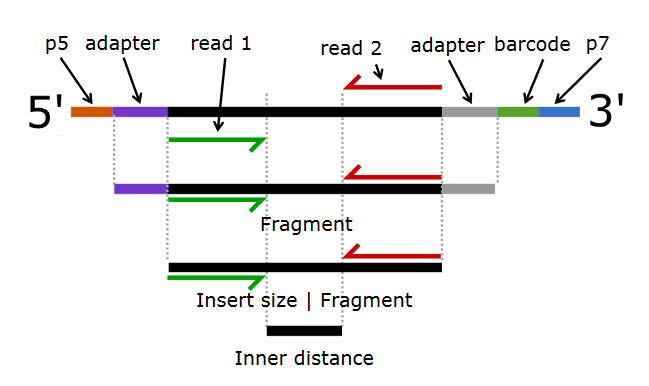


#### Illumina - limitations:

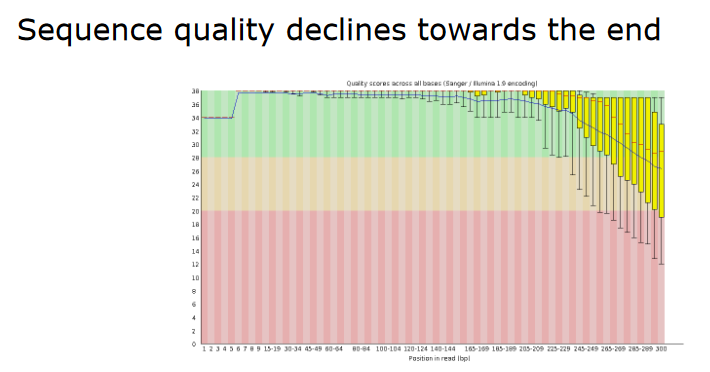

-------------------------------------------------------------------------------------------------------------------------------

## Long reads (3rd generation)

- Crux: maximizing signal from a single molecule base read-out. Single molecule, so no out-of-phase signal

- Two frequently used platforms:
    - PacBio SMRT sequencing
    - Oxford Nanopore Technology

### Oxford Nanopore technology
- Based on changes in electrical current
- Well-known for its scalability and portability
- ~95-97% accuracy

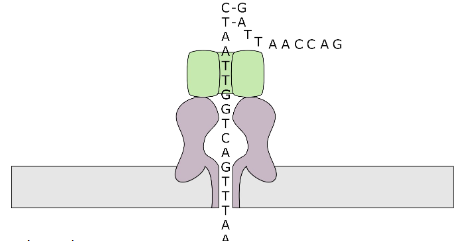


- Image from: https://doi.org/10.5281/zenodo.4636843

### PacBio sequencing
- Polymerase bound to ZMW bottom
- Circular molecules
- Single read out ~90% accuracy
- CCS (HiFi): single molecule sequenced multiple times

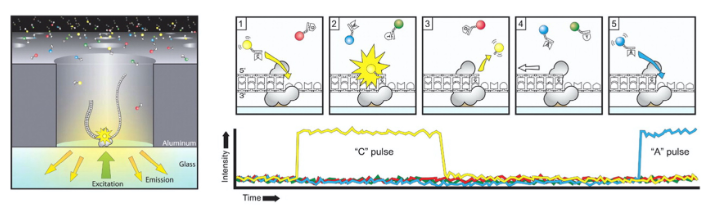


- Image from: Rhoads A, Au KF. Genomics Proteomics Bioinformatics 2015;13:278–89

-------------------------------------------------------------------------------------------------------------------------------

## Quality control
- Find information about a sequence run on the Sequence Read Archive
- Run fastqc on sequence reads and interpret the results
- Trim adapters and low quality bases using cutadapt

FASTQC - https://www.bioinformatics.babraham.ac.uk/projects/fastqc/INSTALL.txt

cutadapt - https://cutadapt.readthedocs.io/en/stable/

SRA - https://www.ncbi.nlm.nih.gov/sra/

- Browse around the SRA entry and answer these questions:
    - Is the dataset paired-end or single end?
    - Which instrument was used for sequencing?
    - What is the read length?
    - How many reads do we have?

#### Step 01 - Download and evaluate the dataset
- Make a directory reads in ~/workdir.
- Download the reads from the SRA database using prefetch and fastq-dump from SRA-Tools into the reads directory. 

- Run 01_download_reads.sh from folder

#### Step 02 - Run fastqc
- Run 02_run_fastqc.sh from folder

#### Step 03 - Trim the reads
- We will use cutadapt for trimming adapters and low quality bases from our reads. The most used adapters for Illumina are TruSeq adapters. 
- To run cutadapt you need to specify the adapter sequences with options -a (or --adapter) and -A.

- We want to:
    - trim bases with a quality lower then cutoff from the 3’ and 5’ end of the reads,
    - keep only reads with a read length not shorter than cutoff base pairs.


- Run 03_trim_reads.sh from folder

#### Step 04 - Run fastqc on trimed file
- Run 04_run_fastqc_trimmed.sh from folder
    - Check for improvement in quality
    - Reduction in number of reads

## Read alignment

- Explain what a sequence aligner does
- Explain why in some cases the aligner needs to be ‘splice-aware’
- Calculate mapping quality out of the probability that a mapping position is wrong
- Build an index of the reference and perform an alignment of paired-end reads with bowtie2

Bowtie - http://bowtie-bio.sourceforge.net/bowtie2/manual.shtml#command-line

Ben Langmead’s youtube channel for  suffix matrixes/trees - https://www.youtube.com/channel/UCrDmN9uRVJR7KM8aRE_58Zw

- Aligner finds substrings(reads) in large string(ref)
    - Basics of indexing and querying to be studied!
    
    
- Softwares:
    - Basic alignment:
        - bowtie2 (BWT; default = global)
        - bwa-mem (BWT; default = local )
    - Splice-aware (RNA-seq):
        - hisat2
        - STAR
    - Long reads + short reads + splice-aware:
        - minimap2


- Mapping quality:
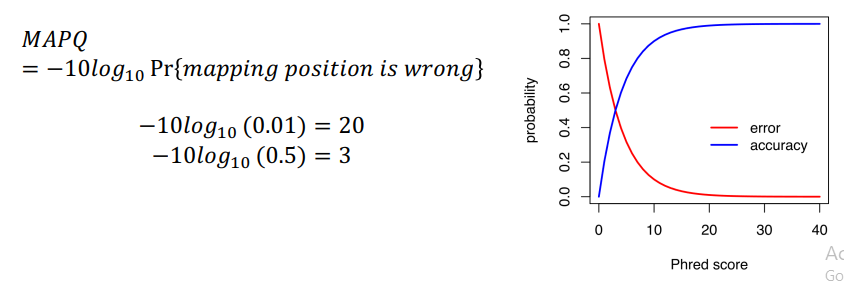

#### Step 05 - Preparing the reference sequence
- Run 05_download_ecoli_reference.sh
    - Downloading reference genome

- Run 06_build_bowtie_index.sh
    -  Indexing reference genome with bowtie2

#### Step 06 - Aligning the reads with bowtie2
Syntax for aligning using bowtie:
- bowtie2 [options]* -x <bt2-idx> {-1 <m1> -2 <m2> | -U <r> | --interleaved <i> | --sra-acc <acc> | b <bam>}
    - We’ll need the options:
        -x to point to our index
        -1 and -2 to point to our forward and reverse reads
    
Run 07_align_reads.sh
    
- bowtie2 writes some statistics to stdout
- non-concordant alignments ? - http://bowtie-bio.sourceforge.net/bowtie2/manual.shtml#concordant-pairs-match-pair-expectations-discordant-pairs-dont


## File types

#### 1. fasta - sequences
- Plain sequence: *.fasta or *.fa
- Nucleotides or amino acids
- Useful command:
    - grep -c "^>" sequence.fasta

#### 2. fastq - reads


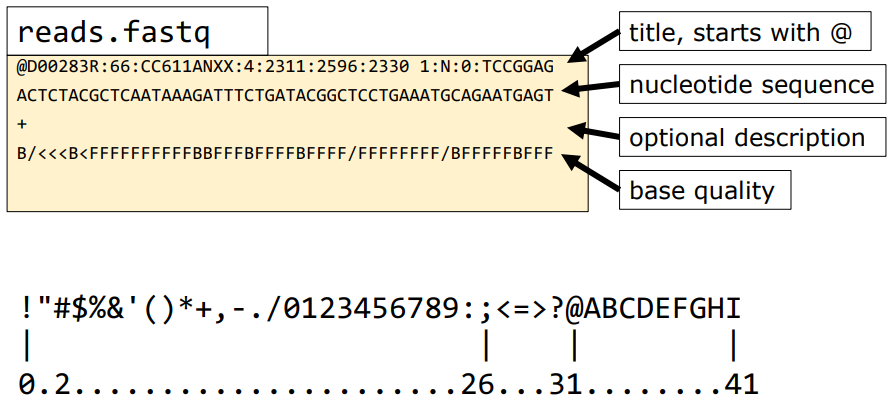

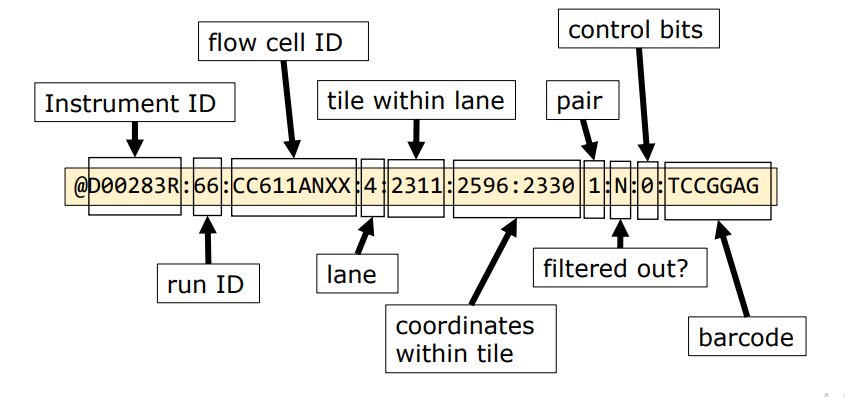

#### 3. SAM (sequence alignment format) - alignment
- Column | example
- read name | @D00283R:66:CC611..
- flag | 89
- reference | U00096.3
- start position | 12513
- mapping quality | 42
- CIGAR string | 5M2D7M3S
- reference name mate is mapped | =
- start position mate | 12928
- fragment length | 430
- sequence | CATCACCATTCCCAC
- base quality | @>4:4C@89+&9CC@
- optional | AS:i:-2
- optional | XN:i:0

https://www.biostars.org/p/17043/
https://www.biostars.org/p/354942/
https://samtools.github.io/hts-specs/SAMv1.pdf

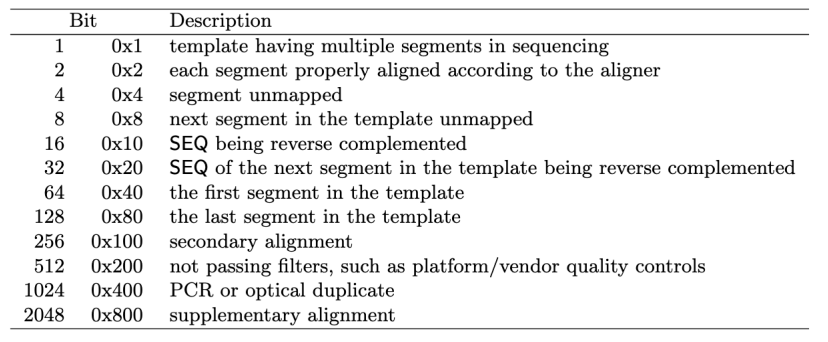

https://samtools.github.io/hts-specs/SAMv1.pdf

#### 4. BED (Browser Extensible Data) - specify regions
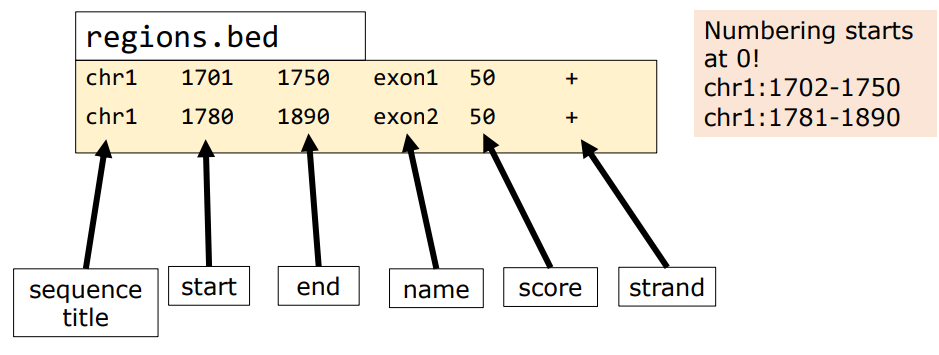

#### 5. GFF (General Feature Format) - Annotation
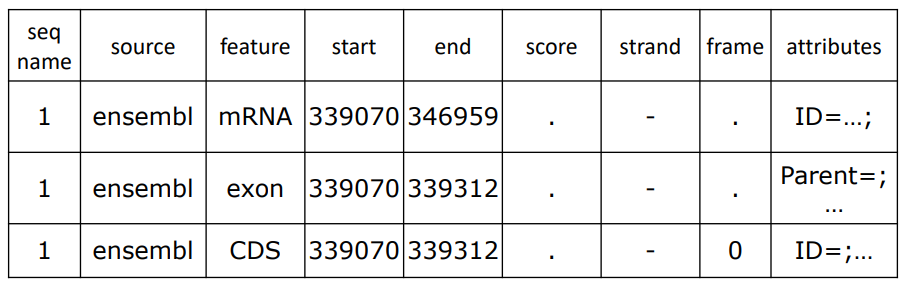

#### 6. VCF (Variant Call Format) - variants
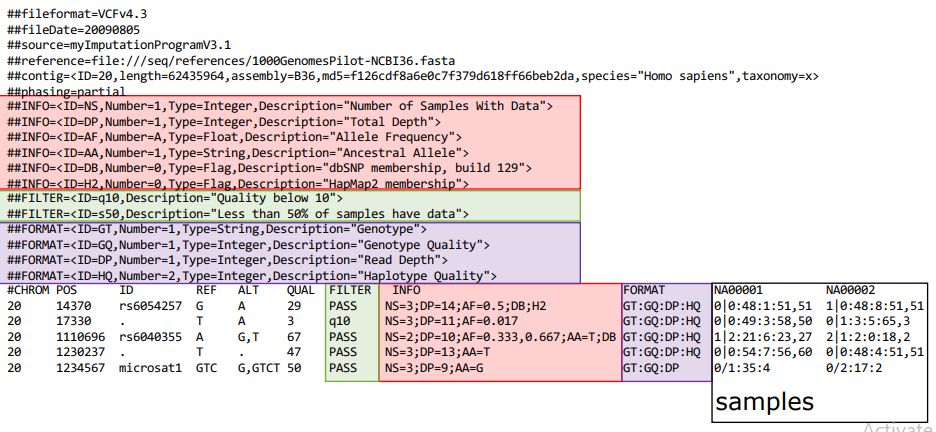

## Samtools

- Use samtools flagstat to get general statistics on the flags stored in a sam/bam file
- Use samtools view to:
    - compress a sam file into a bam file
    - filter on sam flags
    - count alignments
    - filter out a region
- Use samtools sort to sort an alignment file based on coordinate
- Use samtools index to create an index of a sorted sam/bam file
- Use the pipe (|) symbol to pipe alignments directly to samtools to perform sorting and filtering

samtools - http://www.htslib.org/doc/samtools.html

Explain sam flags- https://broadinstitute.github.io/picard/explain-flags.html

#### Alignment statistics
samtools flagstat - http://www.htslib.org/doc/samtools-flagstat.html


- cd ~/workdir/alignment_output/
- samtools flagstat SRR519926.sam

- You can find info on insert size distribution like this:
    - samtools stats SRR519926.sam | grep ^SN | cut -f 2,3

#### Compression, sorting and indexing
- samtools view:  It takes an alignment file and writes a filtered or processed alignment to the output


- Run 08_compress_sort.sh to:
    - convert SAM to BAM
    - To look up specific alignments, it is convenient to have your alignment file indexed. 
    - Indexing is done with samtools as well, but it first needs to be sorted on coordinate (i.e. the alignment location).
    - samtools sort SRR519926.bam > SRR519926.sorted.bam
    - samtools index SRR519926.sorted.bam


- There are two main differences:
    - The SO tag at @HD type code has changed from unsorted to coordinate.
    - A line with the @PG type code for the sorting was added.
Note that the command to view the header (samtools -H) is also added to the header for both runs.

#### Filtering

- With samtools view you can easily filter your alignment file based on flags. 
- To filter out unmapped reads.
- You will need the 0x4 flag.

- samtools view -bh -F 0x4 SRR519926.sorted.bam > SRR519926.sorted.mapped.bam
or
- samtools view -bh -F 4 SRR519926.sorted.bam > SRR519926.sorted.mapped.bam

- Run 09_extract_unmapped&mapped.sh to generate two seperate file for mapped and ummapped and to get the count in each file.

- samtools view also enables you to filter alignments in a specific region. 
- This can be convenient if you don’t want to work with huge alignment files and if you’re only interested in alignments in a particular region. 
- Region filtering only works for sorted and indexed alignment files.

- Run 10_extract_region.sh

#### Redirection
- Samtools is easy to use in a pipe. 
- In this case you can replace the input file with a -. 
- For example, you can sort and compress the output of your alignment software in a pipe like this:

my_alignment_command | samtools sort - | samtools view -bh - > alignment.bam


- Run 11_align_sort_filter.sh

## IGV and visualisation
- Prepare a bam file for loading it into IGV
- Use IGV to:
    - Navigate through a reference genome and alignments
    - Retrieve information on a specific alignment
    - Investigate (possible) variants
    - Identify repeats and large INDELs

- Tutorial: https://github.com/griffithlab/rnaseq_tutorial/wiki/IGV-Tutorial
- Other tutorials from the same hub: 
    - Tools that integrate DNA-seq and RNA-seq data to help interpret mutations in a regulatory and splicing context.
        - https://github.com/griffithlab/regtools
    - RNAseq tutorial
        - https://github.com/griffithlab/rnaseq_tutorial

- Index the alignment that was filtered for the region between 2000 and 2500 kb
- samtools index SRR519926.sorted.region.bam

Download it together with it’s index file (SRR519926.sorted.region.bam.bai) and the reference genome (ecoli-strK12-MG1655.fasta) to your desktop.
- Load the genome (.fasta) into IGV: Genomes > Load Genome from File…
- Load the alignment file (.bam): File > Load from File…
- Zoom in into the region U00096.3:2046000-2048000.

A lot of model-organism genomes are built-in IGV. Select the human genome version hg19 from the drop down menu:
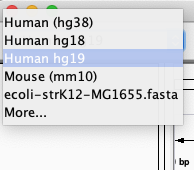

- Select File > Load from File… from the main menu and select the BAM file HCC1143.normal.21.19M-20M.bam using the file browser.

- This BAM file only contains data for a 1 Megabase region of chromosome 21. Let’s navigate there to see what genes this region covers. To do so, navigate to chr21:19,000,000-20,000,000.

- Navigate to the gene CHODL by typing it in the search box.
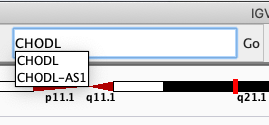

- Load the dbsnp annotations by clicking File > Load From Server… > Annotations > Variation and Repeats > dbSNP 1.4.7

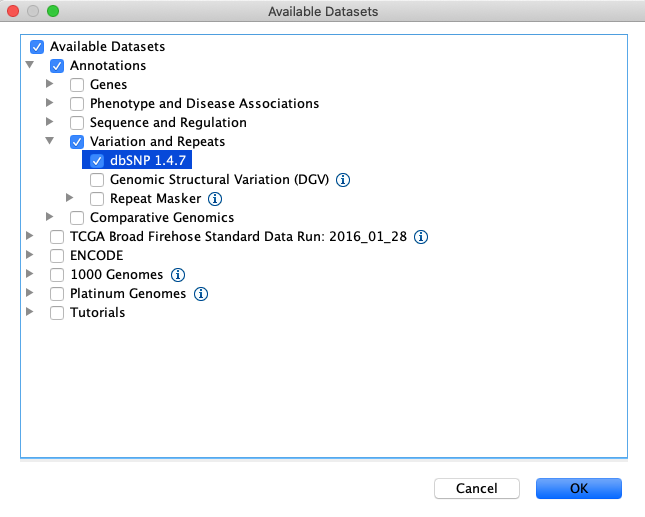

- Like you did with the gene (i.e. by typing it in the search box), navigate to SNP rs3827160 that is annotated in the loaded file.

- Click on the coverage track where the SNP is:
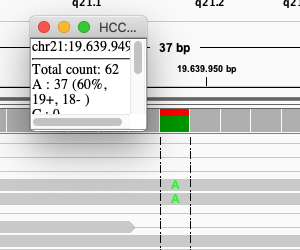

- Navigate to region chr21:19,800,320-19,818,162

- Load repeat tracks by selecting File > Load from Server… from the main menu and then select Annotations > Variation and Repeats > Repeat Masker

- Right click in the alignment track and select Color alignments by > insert size and pair orientation

- Navigate to region chr21:19,324,500-19,331,500

- Right click in the main alignment track and select:

- Expanded
    - View as pairs
    - Color alignments by > insert size and pair orientation
    - Sort alignments by > insert size